<a href="https://colab.research.google.com/github/therokitoki/AA2_TP_Alsop-Hachen-Nemeth/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

REPO_NAME = "AA2_TP_Alsop-Hachen-Nemeth"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/therokitoki/{REPO_NAME}.git
  os.chdir(REPO_NAME)

# Problema 1

## Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

## Dataset:
El dataset proporcionado incluye las siguientes variables para cada estudiante:
Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.
## Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.


# Preparación del entorno

In [2]:
!pip install pandas
!pip install scikit-learn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [4]:
dataset_1 = '/content/AA2_TP_Alsop-Hachen-Nemeth/datasets/Student_Performance.csv'

In [5]:
student_df = pd.read_csv(dataset_1)
student_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Observamos que las variables cuantitativas están correctamente configuradas como **numéricas**.

Codificación de variables

In [7]:
student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# División de datos

In [8]:
X = student_df.drop('Performance Index', axis=1)
y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Cantidad de datos luego de la separación')
print(f'Train: {X_train.shape[0]} - 80%\n Test: {X_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 8000 - 80%
 Test: 2000 - 20%


# EDA

- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [9]:
print('Variables cuantitativas: ')
print(X_train.describe())
print('\nVariables cualitativas: ')
print(X_train['Extracurricular Activities'].describe())

Variables cuantitativas: 
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    8000.000000      8000.000000                 8000.000000   
mean        4.983250        69.531000                    0.494625   
std         2.594862        17.343735                    0.500002   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.750000                    0.000000   
50%         5.000000        70.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  
count  8000.000000                       8000.000000  
mean      6.541625                          4.616500  
std       1.698493                          2.861241  
min       4.000000                          0.000000  
25%       5.000000                          2.000000  
50%       7.000000    

### Valores NaN

In [10]:
na_values = X_train.isnull().sum()
print(f'Valores Nan:\n{na_values}')
if na_values.sum() == 0:
    print('\nNo se encontraron valores Nan')
print('\nFilas duplicadas:',X_train.duplicated().sum())

Valores Nan:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

No se encontraron valores Nan

Filas duplicadas: 503


### Matriz de correlación

ROKI DUDA: Deberíamos ver la relación con la variable target?

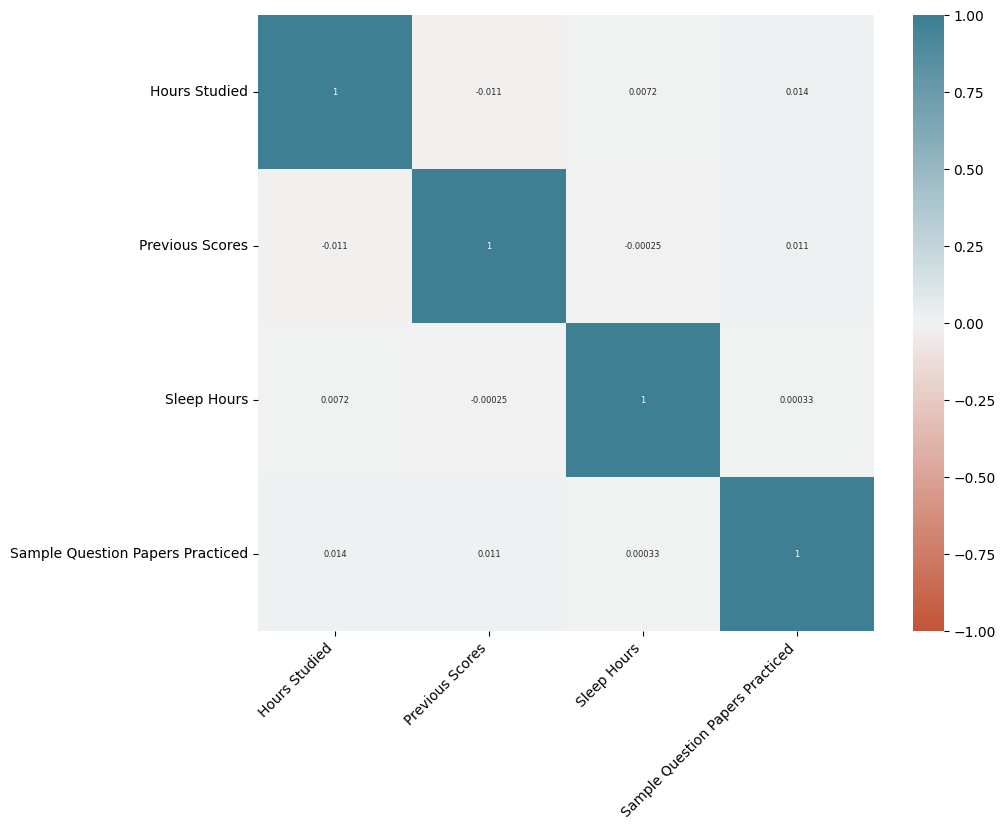

In [11]:
X_train_corr=pd.DataFrame(X_train,columns=X_train.drop(columns=['Extracurricular Activities']).columns)

plt.figure(figsize=(10,8))
corr = X_train_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

# Definición del modelo

In [12]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.summary()

model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['R2Score','mse'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - R2Score: -2.6632 - loss: 1328.8710 - mse: 1328.8710 - val_R2Score: 0.8517 - val_loss: 54.7961 - val_mse: 54.7961
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - R2Score: 0.8629 - loss: 50.1874 - mse: 50.1874 - val_R2Score: 0.8970 - val_loss: 38.0773 - val_mse: 38.0773
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - R2Score: 0.9026 - loss: 35.7006 - mse: 35.7006 - val_R2Score: 0.9170 - val_loss: 30.6742 - val_mse: 30.6742
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - R2Score: 0.9172 - loss: 30.8335 - mse: 30.8335 - val_R2Score: 0.9219 - val_loss: 28.8786 - val_mse: 28.8786
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - R2Score: 0.9229 - loss: 28.2285 - mse: 28.2285 - val_R2Score: 0.9259 - val_loss: 27.4028 - val_mse: 27.4028
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9270 - loss: 26.9119 - mse: 26.9119 - val_R2Score: 0.9279 - val_loss: 26.6330 - val_mse: 26.6330
Epoch 7/100
200/

# Resultados

In [14]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test R2: {results[1]}")
print(f"Test MSE: {results[2]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - R2Score: 0.9877 - loss: 4.7368 - mse: 4.7368
Test R2: 0.9873956441879272
Test MSE: 4.670987606048584


In [21]:
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({
    'Real': np.array(y_test),
    'Predicción': y_pred.flatten()
})
comparison_df

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Real,Predicción
0,51.0,55.383198
1,20.0,23.227234
2,46.0,48.442787
3,28.0,31.729544
4,41.0,43.486179
...,...,...
1995,45.0,47.661076
1996,66.0,63.486538
1997,16.0,17.338909
1998,65.0,64.205719
